In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import datasets

# 데이터를 로드
iris=datasets.load_iris()
features, target=iris.data, iris.target

# 결정 트리 분류기
decisiontree=DecisionTreeClassifier(random_state=0)

# 모델을 훈련
model=decisiontree.fit(features,target)

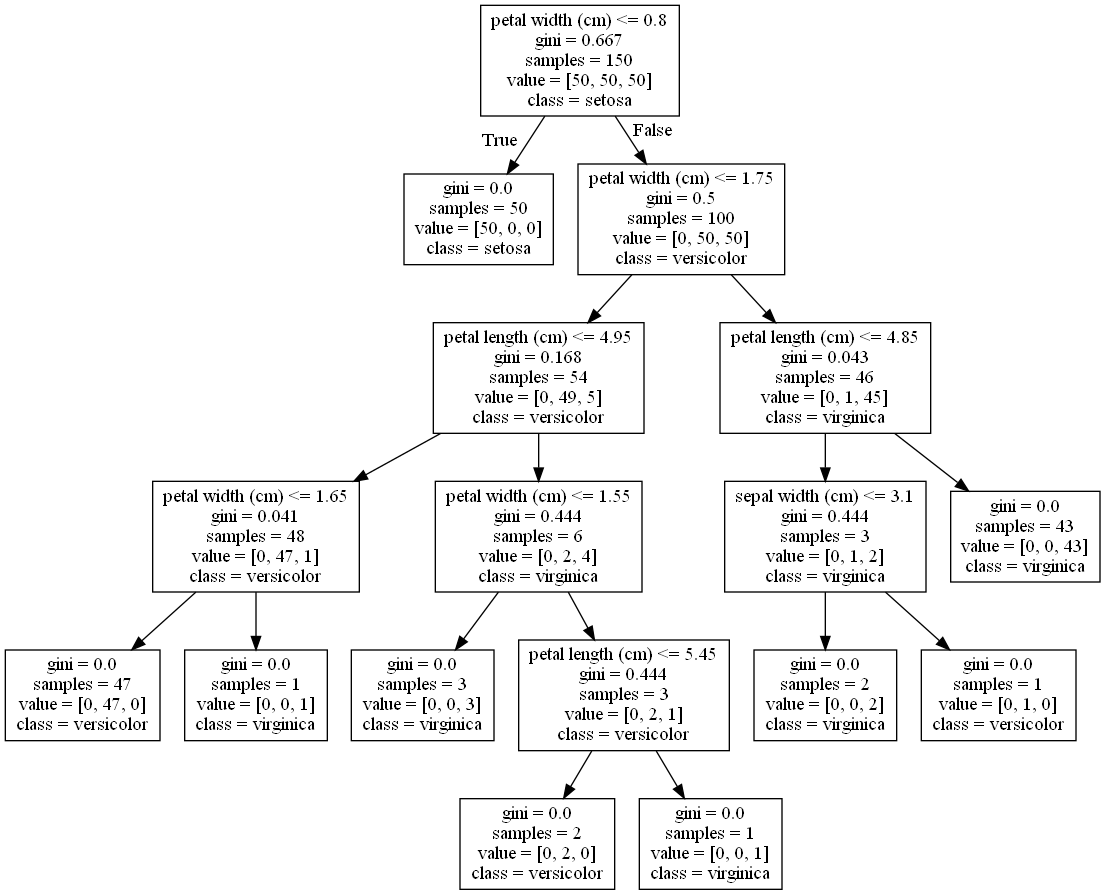

In [3]:
# 트리 모델 시각화
import pydotplus
from IPython.display import Image
from sklearn import tree

# DOT 데이터
dot_data=tree.export_graphviz(decisiontree, out_file=None, feature_names=iris.feature_names, class_names=iris.target_names)
graph=pydotplus.graph_from_dot_data(dot_data)

# 그래프를 출력
Image(graph.create_png())

In [4]:
# PDF
graph.write_pdf('iris.pdf')

True

In [5]:
# PNG 파일
graph.write_png('iris.png')

True

In [6]:
# 랜덤포레스트 모형
from sklearn.ensemble import RandomForestClassifier
from sklearn import datasets

# 데이터를 로드
iris=datasets.load_iris()
features, target=iris.data, iris.target

# 랜덤포레스트 분류기 객체
randomforest=RandomForestClassifier(random_state=0, n_jobs=-1)

# 모델을 훈련
model=randomforest.fit(features, target)

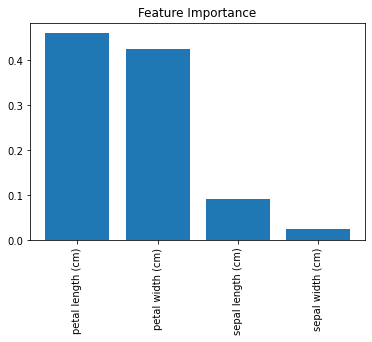

In [7]:
# 랜덤 포레스트에서 중요한 특성 구분하기
import numpy as np
import matplotlib.pyplot as plt

# 특성 중요도를 계산
importances=model.feature_importances_

# 특성 중요도를 내림차순으로 정렬
indices=np.argsort(importances)[::-1]

# 정렬된 특성 중요도에 따라 특성의 이름을 나열
names=[iris.feature_names[i] for i in indices]

# 그래프
plt.figure()

# 그래프 제목을 지정
plt.title("Feature Importance")

# 막대 그래프를 추가
plt.bar(range(features.shape[1]), importances[indices])

# x축 레이블로 특성 이름을 사용
plt.xticks(range(features.shape[1]), names, rotation=90)

# 그래프를 출력
plt.show()

In [8]:
# 특성 중요도를 확인
model.feature_importances_

array([0.09090795, 0.02453104, 0.46044474, 0.42411627])

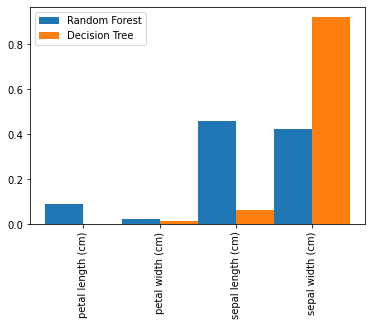

In [9]:
# 트리 분류기
decisiontree=DecisionTreeClassifier(random_state=0)

# 모델을 훈련
model=decisiontree.fit(features, target)

# 랜덤포레스트와 결정 트리의 특성 중요도를 비교
fig, ax=plt.subplots()
rects1=ax.bar(np.arange(features.shape[1])-0.25, randomforest.feature_importances_, 0.5, label='Random Forest')
rects2=ax.bar(np.arange(features.shape[1])+0.25, model.feature_importances_, 0.5, label='Decision Tree')
plt.xticks(range(features.shape[1]), names, rotation=90)
plt.legend()
plt.show()

In [10]:
# 랜덤포레스트에서 중요한 특성 선택하기
# 중요한 특성을 구별하고 가장 중요한 특성들만 사용하여 모형을 다시 학습시키는 방법
from sklearn.feature_selection import SelectFromModel

# 특성 중요도가 임계값(여기서는 0.3)보다 크거나 같은 특성으로 객체
selector=SelectFromModel(randomforest, threshold=0.3)

# selector를 사용하여 새로운 특성 행렬
features_important=selector.fit_transform(features, target)
print(features_important[:5])

# 가장 중요한 특성을 사용하여 랜덤포레스트 모델을 훈련
model=randomforest.fit(features_important, target)
model.score(features_important, target)

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]]


0.9933333333333333